[Data_School](https://www.youtube.com/watch?v=6dbrR-WymjI&list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A&index=7)

In [2]:
%matplotlib inline

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

iris = load_iris()
X = iris.data
y = iris.target
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

(150, 4)
(150,)
(112, 4)
(112,)
(38, 4)
(38,)
0.9736842105263158


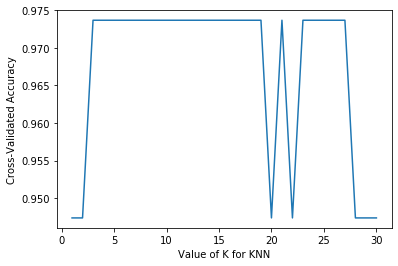

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=4)


k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    k_scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

[(1, 0.96), (2, 0.9533333333333334), (3, 0.9666666666666666), (4, 0.9666666666666666), (5, 0.9666666666666668), (6, 0.9666666666666668), (7, 0.9666666666666668), (8, 0.9666666666666668), (9, 0.9733333333333334), (10, 0.9666666666666668), (11, 0.9666666666666668), (12, 0.9733333333333334), (13, 0.9800000000000001), (14, 0.9733333333333334), (15, 0.9733333333333334), (16, 0.9733333333333334), (17, 0.9733333333333334), (18, 0.9800000000000001), (19, 0.9733333333333334), (20, 0.9800000000000001), (21, 0.9666666666666666), (22, 0.9666666666666666), (23, 0.9733333333333334), (24, 0.96), (25, 0.9666666666666666), (26, 0.96), (27, 0.9666666666666666), (28, 0.9533333333333334), (29, 0.9533333333333334), (30, 0.9533333333333334)]


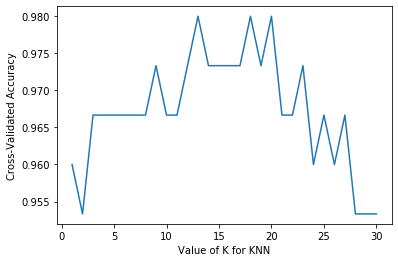

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X = iris.data
y = iris.target

k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
cv_result = list(zip(k_range, k_scores))
print(cv_result)
    
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

iris = load_iris()
X = iris.data
y = iris.target

knn = KNeighborsClassifier(n_neighbors=5)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())
print()

knn = KNeighborsClassifier(n_neighbors=13)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())
print()

knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())
print()

logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.9666666666666668

0.9800000000000001

0.9800000000000001

0.9533333333333334


/Users/sungchul/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sungchul/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/sungchul/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sungchul/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/sungchul/anaconda3/lib/python3.7/site-packages/sklearn/

In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

data = pd.read_csv('data/Advertising.csv', index_col=0)
print(data.head())

X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']
print(X.shape)
print(y.shape)

reg = LinearRegression()
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html
scoring = metrics.make_scorer(metrics.mean_squared_error)
cv_score = cross_val_score(
    reg,
    X, y,
    cv=10,
    # scoring=‘neg_mean_squared_error’).mean()
    # scoring=‘mean_squared_error’).mean() # error
    # scoring=metrics.mean_squared_error).mean() # error
    # scoring=scorer(metrics.mean_squared_error, X, y)).mean() # error
    scoring=scoring).mean()
print(cv_score)

score = []
for feature_drop in ['TV', 'Radio', 'Newspaper']:
    feature_cols = ['TV', 'Radio', 'Newspaper']     
    feature_cols.remove(feature_drop)

    X_new = X[feature_cols]
    
    reg = LinearRegression()
    # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html
    scoring = metrics.make_scorer(metrics.mean_squared_error)
    cv_score = cross_val_score(reg, 
                               X_new, y, 
                               cv=10, 
                               scoring=scoring).mean()
    score.append(cv_score)
    
feature_cols = ['TV', 'Radio', 'Newspaper']
print(feature_cols) 
print(score)

      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
(200, 3)
(200,)
3.0599676181185127
['TV', 'Radio', 'Newspaper']
[19.04730013282136, 9.891546900360186, 3.013919155540469]
